In [38]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [2]:
df = pd.read_csv('../data/all_cities.csv')

In [3]:
df

,Unnamed: 0,title,toprow,roominfo,facilities,price,rating,link,review,city
0,0,"1546 | Epic views, wood floors, No Cleaning Fe...",Entire condominium in Keystone,4 guests · 1 bedroom · 1 bed · 1 bath,Wifi·Kitchen·Freeparking,Price:$112,Rating 4.72 out of 5;,http://airbnb.com/rooms/20933445?adults=1&prev...,186 reviews,Breckinridge
1,1,Grand Lodge on Peak 7 Luxury Villa ski-in/out ...,Entire villa in Breckenridge,4 guests · 1 bedroom · 2 beds · 1 bath,Hottub·Wifi·Kitchen·Freeparking,Price:$113,Price:,http://airbnb.com/rooms/15990883?adults=1&prev...,-1,Breckinridge
2,2,Mountain Lodge/Walk to town 2BR/2BA. - null - ...,Entire condominium in Breckenridge,6 guests · 2 bedrooms · 4 beds · 2 baths,Hottub·Wifi·Kitchen·Freeparking,Price:$145,Rating 4.89 out of 5;,http://airbnb.com/rooms/9678588?adults=1&previ...,18 reviews,Breckinridge
3,3,Breckenridge Ski Lodge Resort Home - null - Br...,Resort room in Breckenridge,4 guests · 1 bedroom · 2 beds · 1 private bath,Hottub·Wifi·Kitchen·Freeparking,Price:$25,Price:,http://airbnb.com/rooms/45893630?adults=1&prev...,-1,Breckinridge
4,4,"7767 | Ski-in/out Peak 9, Olympic Heated Pool!...",Entire condominium in Breckenridge,4 guests · Studio · 1 bed · 1 bath,Hottub·Wifi·Kitchen·Freeparking,Price:$113,Rating 4.85 out of 5;,http://airbnb.com/rooms/23859468?adults=1&prev...,100 reviews,Breckinridge
...,...,...,...,...,...,...,...,...,...,...
2995,15,1 Block to Plaza! Rio Grande by Inger Jirby - ...,Entire condominium in Taos,2 guests · 1 bedroom · 3 beds · 1 bath,Wifi·Kitchen·Heating·Freeparking,Price:$164,Price:,http://airbnb.com/rooms/43152814?adults=1&prev...,-1,Taos
2996,16,Casa Sofia-Safe and Disinfected refuge awaits ...,Entire house in Arroyo Seco,6 guests · 3 bedrooms · 3 beds · 2 baths,Wifi·Kitchen·Heating·Freeparking,Price:$250,Rating 4.92 out of 5;,http://airbnb.com/rooms/8427086?adults=1&previ...,65 reviews,Taos
2997,17,Casa Madre - null - Taos,Entire house in Taos,8 guests · 3 bedrooms · 3 beds · 2 baths,Wifi·Kitchen·Heating·Freeparking,Price:$195,Rating 4.87 out of 5;,http://airbnb.com/rooms/16955934?adults=1&prev...,77 reviews,Taos
2998,18,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,Entire house in Arroyo Seco,8 guests · 3 bedrooms · 5 beds · 3 baths,Wifi·Kitchen·Heating·Freeparking,Price:$285,Rating 4.86 out of 5;,http://airbnb.com/rooms/26161007?adults=1&prev...,8 reviews,Taos


In [4]:
#Clean Facilities Feature
df.loc[:, "facilities"] = df["facilities"].astype(str).str.replace("[","").str.replace("]","")
vectorizer = CountVectorizer(decode_error = "ignore") 
X = vectorizer.fit_transform(df.facilities)
bag_of_words = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df = pd.concat([df.reset_index(drop=True).drop("facilities", axis = 1), bag_of_words], axis=1)

In [5]:
df

,Unnamed: 0,title,toprow,roominfo,price,rating,link,review,city,bbqgrill,...,housekeeping,kitchen,pool,skitchen,sonossoundsystem,terrace,washer,waterfront,wetbar,wifi
0,0,"1546 | Epic views, wood floors, No Cleaning Fe...",Entire condominium in Keystone,4 guests · 1 bedroom · 1 bed · 1 bath,Price:$112,Rating 4.72 out of 5;,http://airbnb.com/rooms/20933445?adults=1&prev...,186 reviews,Breckinridge,0,...,0,1,0,0,0,0,0,0,0,1
1,1,Grand Lodge on Peak 7 Luxury Villa ski-in/out ...,Entire villa in Breckenridge,4 guests · 1 bedroom · 2 beds · 1 bath,Price:$113,Price:,http://airbnb.com/rooms/15990883?adults=1&prev...,-1,Breckinridge,0,...,0,1,0,0,0,0,0,0,0,1
2,2,Mountain Lodge/Walk to town 2BR/2BA. - null - ...,Entire condominium in Breckenridge,6 guests · 2 bedrooms · 4 beds · 2 baths,Price:$145,Rating 4.89 out of 5;,http://airbnb.com/rooms/9678588?adults=1&previ...,18 reviews,Breckinridge,0,...,0,1,0,0,0,0,0,0,0,1
3,3,Breckenridge Ski Lodge Resort Home - null - Br...,Resort room in Breckenridge,4 guests · 1 bedroom · 2 beds · 1 private bath,Price:$25,Price:,http://airbnb.com/rooms/45893630?adults=1&prev...,-1,Breckinridge,0,...,0,1,0,0,0,0,0,0,0,1
4,4,"7767 | Ski-in/out Peak 9, Olympic Heated Pool!...",Entire condominium in Breckenridge,4 guests · Studio · 1 bed · 1 bath,Price:$113,Rating 4.85 out of 5;,http://airbnb.com/rooms/23859468?adults=1&prev...,100 reviews,Breckinridge,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,15,1 Block to Plaza! Rio Grande by Inger Jirby - ...,Entire condominium in Taos,2 guests · 1 bedroom · 3 beds · 1 bath,Price:$164,Price:,http://airbnb.com/rooms/43152814?adults=1&prev...,-1,Taos,0,...,0,1,0,0,0,0,0,0,0,1
2996,16,Casa Sofia-Safe and Disinfected refuge awaits ...,Entire house in Arroyo Seco,6 guests · 3 bedrooms · 3 beds · 2 baths,Price:$250,Rating 4.92 out of 5;,http://airbnb.com/rooms/8427086?adults=1&previ...,65 reviews,Taos,0,...,0,1,0,0,0,0,0,0,0,1
2997,17,Casa Madre - null - Taos,Entire house in Taos,8 guests · 3 bedrooms · 3 beds · 2 baths,Price:$195,Rating 4.87 out of 5;,http://airbnb.com/rooms/16955934?adults=1&prev...,77 reviews,Taos,0,...,0,1,0,0,0,0,0,0,0,1
2998,18,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,Entire house in Arroyo Seco,8 guests · 3 bedrooms · 5 beds · 3 baths,Price:$285,Rating 4.86 out of 5;,http://airbnb.com/rooms/26161007?adults=1&prev...,8 reviews,Taos,0,...,0,1,0,0,0,0,0,0,0,1


In [6]:
#Clean Title Feature
df.loc[:, "name"] = df["title"].str.split(" null ", n = 0, expand = True)[0].str.replace("-", "")
df.loc[:, "location"] = df["title"].str.split(" null ", n = 0, expand = True)[1].str.replace("-", "").str.strip()

In [7]:
#Clean Top Row
df.loc[:, 'roomtype'] = df["toprow"].str.split(" in ", n = 0, expand = True)[0] 
df.loc[:, 'detailed_location'] = df["toprow"].str.split(" in ", n = 0, expand = True)[1] 
df.drop("toprow", axis = 1)

,Unnamed: 0,title,roominfo,price,rating,link,review,city,bbqgrill,chef,...,sonossoundsystem,terrace,washer,waterfront,wetbar,wifi,name,location,roomtype,detailed_location
0,0,"1546 | Epic views, wood floors, No Cleaning Fe...",4 guests · 1 bedroom · 1 bed · 1 bath,Price:$112,Rating 4.72 out of 5;,http://airbnb.com/rooms/20933445?adults=1&prev...,186 reviews,Breckinridge,0,0,...,0,0,0,0,0,1,"1546 | Epic views, wood floors, No Cleaning Fe...",Keystone,Entire condominium,Keystone
1,1,Grand Lodge on Peak 7 Luxury Villa ski-in/out ...,4 guests · 1 bedroom · 2 beds · 1 bath,Price:$113,Price:,http://airbnb.com/rooms/15990883?adults=1&prev...,-1,Breckinridge,0,0,...,0,0,0,0,0,1,Grand Lodge on Peak 7 Luxury Villa skiin/out 1BR,Breckenridge,Entire villa,Breckenridge
2,2,Mountain Lodge/Walk to town 2BR/2BA. - null - ...,6 guests · 2 bedrooms · 4 beds · 2 baths,Price:$145,Rating 4.89 out of 5;,http://airbnb.com/rooms/9678588?adults=1&previ...,18 reviews,Breckinridge,0,0,...,0,0,0,0,0,1,Mountain Lodge/Walk to town 2BR/2BA.,Breckenridge,Entire condominium,Breckenridge
3,3,Breckenridge Ski Lodge Resort Home - null - Br...,4 guests · 1 bedroom · 2 beds · 1 private bath,Price:$25,Price:,http://airbnb.com/rooms/45893630?adults=1&prev...,-1,Breckinridge,0,0,...,0,0,0,0,0,1,Breckenridge Ski Lodge Resort Home,Breckenridge,Resort room,Breckenridge
4,4,"7767 | Ski-in/out Peak 9, Olympic Heated Pool!...",4 guests · Studio · 1 bed · 1 bath,Price:$113,Rating 4.85 out of 5;,http://airbnb.com/rooms/23859468?adults=1&prev...,100 reviews,Breckinridge,0,0,...,0,0,0,0,0,1,"7767 | Skiin/out Peak 9, Olympic Heated Pool!",Breckenridge,Entire condominium,Breckenridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,15,1 Block to Plaza! Rio Grande by Inger Jirby - ...,2 guests · 1 bedroom · 3 beds · 1 bath,Price:$164,Price:,http://airbnb.com/rooms/43152814?adults=1&prev...,-1,Taos,0,0,...,0,0,0,0,0,1,1 Block to Plaza! Rio Grande by Inger Jirby,Taos,Entire condominium,Taos
2996,16,Casa Sofia-Safe and Disinfected refuge awaits ...,6 guests · 3 bedrooms · 3 beds · 2 baths,Price:$250,Rating 4.92 out of 5;,http://airbnb.com/rooms/8427086?adults=1&previ...,65 reviews,Taos,0,0,...,0,0,0,0,0,1,Casa SofiaSafe and Disinfected refuge awaits you,Arroyo Seco,Entire house,Arroyo Seco
2997,17,Casa Madre - null - Taos,8 guests · 3 bedrooms · 3 beds · 2 baths,Price:$195,Rating 4.87 out of 5;,http://airbnb.com/rooms/16955934?adults=1&prev...,77 reviews,Taos,0,0,...,0,0,0,0,0,1,Casa Madre,Taos,Entire house,Taos
2998,18,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,8 guests · 3 bedrooms · 5 beds · 3 baths,Price:$285,Rating 4.86 out of 5;,http://airbnb.com/rooms/26161007?adults=1&prev...,8 reviews,Taos,0,0,...,0,0,0,0,0,1,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,Arroyo Seco,Entire house,Arroyo Seco


In [8]:
#Clean Room Info
df.loc[:, "guests"] = df.loc[:, "roominfo"].str.split(" · ", n = 0, expand = True)[0].str.replace(" guests", "")
df.loc[:, "bedrooms"] = df.loc[:, "roominfo"].str.split(" . ", n = 0, expand = True)[1]
df.loc[:, "beds"] = df.loc[:, "roominfo"].str.split(" . ", n = 0, expand = True)[2].str.replace(" bed", "").str.replace("s", "")
df.loc[:, "bathrooms"] = df.loc[:, "roominfo"].str.split(" . ", n = 0, expand = True)[3]
df.loc[:, "guests"] = pd.to_numeric(df.guests, errors = 'coerce')
df.loc[:, "beds"] = pd.to_numeric(df.beds, errors = 'coerce')
df.loc[:, "bedrooms"] = pd.to_numeric(df.bedrooms.str.split(" ", n = 0, expand = True)[0], errors = "ignore")
df.loc[:, "bathrooms"] = pd.to_numeric(df.bathrooms.str.split(" ", n = 0, expand = True)[0], errors = "ignore")
df.drop("roominfo", axis = 1)

,Unnamed: 0,title,toprow,price,rating,link,review,city,bbqgrill,chef,...,wetbar,wifi,name,location,roomtype,detailed_location,guests,bedrooms,beds,bathrooms
0,0,"1546 | Epic views, wood floors, No Cleaning Fe...",Entire condominium in Keystone,Price:$112,Rating 4.72 out of 5;,http://airbnb.com/rooms/20933445?adults=1&prev...,186 reviews,Breckinridge,0,0,...,0,1,"1546 | Epic views, wood floors, No Cleaning Fe...",Keystone,Entire condominium,Keystone,4.0,1,1.0,1
1,1,Grand Lodge on Peak 7 Luxury Villa ski-in/out ...,Entire villa in Breckenridge,Price:$113,Price:,http://airbnb.com/rooms/15990883?adults=1&prev...,-1,Breckinridge,0,0,...,0,1,Grand Lodge on Peak 7 Luxury Villa skiin/out 1BR,Breckenridge,Entire villa,Breckenridge,4.0,1,2.0,1
2,2,Mountain Lodge/Walk to town 2BR/2BA. - null - ...,Entire condominium in Breckenridge,Price:$145,Rating 4.89 out of 5;,http://airbnb.com/rooms/9678588?adults=1&previ...,18 reviews,Breckinridge,0,0,...,0,1,Mountain Lodge/Walk to town 2BR/2BA.,Breckenridge,Entire condominium,Breckenridge,6.0,2,4.0,2
3,3,Breckenridge Ski Lodge Resort Home - null - Br...,Resort room in Breckenridge,Price:$25,Price:,http://airbnb.com/rooms/45893630?adults=1&prev...,-1,Breckinridge,0,0,...,0,1,Breckenridge Ski Lodge Resort Home,Breckenridge,Resort room,Breckenridge,4.0,1,2.0,1
4,4,"7767 | Ski-in/out Peak 9, Olympic Heated Pool!...",Entire condominium in Breckenridge,Price:$113,Rating 4.85 out of 5;,http://airbnb.com/rooms/23859468?adults=1&prev...,100 reviews,Breckinridge,0,0,...,0,1,"7767 | Skiin/out Peak 9, Olympic Heated Pool!",Breckenridge,Entire condominium,Breckenridge,4.0,Studio,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,15,1 Block to Plaza! Rio Grande by Inger Jirby - ...,Entire condominium in Taos,Price:$164,Price:,http://airbnb.com/rooms/43152814?adults=1&prev...,-1,Taos,0,0,...,0,1,1 Block to Plaza! Rio Grande by Inger Jirby,Taos,Entire condominium,Taos,2.0,1,3.0,1
2996,16,Casa Sofia-Safe and Disinfected refuge awaits ...,Entire house in Arroyo Seco,Price:$250,Rating 4.92 out of 5;,http://airbnb.com/rooms/8427086?adults=1&previ...,65 reviews,Taos,0,0,...,0,1,Casa SofiaSafe and Disinfected refuge awaits you,Arroyo Seco,Entire house,Arroyo Seco,6.0,3,3.0,2
2997,17,Casa Madre - null - Taos,Entire house in Taos,Price:$195,Rating 4.87 out of 5;,http://airbnb.com/rooms/16955934?adults=1&prev...,77 reviews,Taos,0,0,...,0,1,Casa Madre,Taos,Entire house,Taos,8.0,3,3.0,2
2998,18,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,Entire house in Arroyo Seco,Price:$285,Rating 4.86 out of 5;,http://airbnb.com/rooms/26161007?adults=1&prev...,8 reviews,Taos,0,0,...,0,1,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,Arroyo Seco,Entire house,Arroyo Seco,8.0,3,5.0,3


In [9]:
#Clean Rating
df.loc[:, "score"] = df.loc[:, 'rating'].str.split(" ", n = 0, expand = True)[1]
df.loc[:, "score"] = pd.to_numeric(df.score, errors = "coerce")
df.drop("rating", axis = 1)

,Unnamed: 0,title,toprow,roominfo,price,link,review,city,bbqgrill,chef,...,wifi,name,location,roomtype,detailed_location,guests,bedrooms,beds,bathrooms,score
0,0,"1546 | Epic views, wood floors, No Cleaning Fe...",Entire condominium in Keystone,4 guests · 1 bedroom · 1 bed · 1 bath,Price:$112,http://airbnb.com/rooms/20933445?adults=1&prev...,186 reviews,Breckinridge,0,0,...,1,"1546 | Epic views, wood floors, No Cleaning Fe...",Keystone,Entire condominium,Keystone,4.0,1,1.0,1,4.72
1,1,Grand Lodge on Peak 7 Luxury Villa ski-in/out ...,Entire villa in Breckenridge,4 guests · 1 bedroom · 2 beds · 1 bath,Price:$113,http://airbnb.com/rooms/15990883?adults=1&prev...,-1,Breckinridge,0,0,...,1,Grand Lodge on Peak 7 Luxury Villa skiin/out 1BR,Breckenridge,Entire villa,Breckenridge,4.0,1,2.0,1,NaN
2,2,Mountain Lodge/Walk to town 2BR/2BA. - null - ...,Entire condominium in Breckenridge,6 guests · 2 bedrooms · 4 beds · 2 baths,Price:$145,http://airbnb.com/rooms/9678588?adults=1&previ...,18 reviews,Breckinridge,0,0,...,1,Mountain Lodge/Walk to town 2BR/2BA.,Breckenridge,Entire condominium,Breckenridge,6.0,2,4.0,2,4.89
3,3,Breckenridge Ski Lodge Resort Home - null - Br...,Resort room in Breckenridge,4 guests · 1 bedroom · 2 beds · 1 private bath,Price:$25,http://airbnb.com/rooms/45893630?adults=1&prev...,-1,Breckinridge,0,0,...,1,Breckenridge Ski Lodge Resort Home,Breckenridge,Resort room,Breckenridge,4.0,1,2.0,1,NaN
4,4,"7767 | Ski-in/out Peak 9, Olympic Heated Pool!...",Entire condominium in Breckenridge,4 guests · Studio · 1 bed · 1 bath,Price:$113,http://airbnb.com/rooms/23859468?adults=1&prev...,100 reviews,Breckinridge,0,0,...,1,"7767 | Skiin/out Peak 9, Olympic Heated Pool!",Breckenridge,Entire condominium,Breckenridge,4.0,Studio,1.0,1,4.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,15,1 Block to Plaza! Rio Grande by Inger Jirby - ...,Entire condominium in Taos,2 guests · 1 bedroom · 3 beds · 1 bath,Price:$164,http://airbnb.com/rooms/43152814?adults=1&prev...,-1,Taos,0,0,...,1,1 Block to Plaza! Rio Grande by Inger Jirby,Taos,Entire condominium,Taos,2.0,1,3.0,1,NaN
2996,16,Casa Sofia-Safe and Disinfected refuge awaits ...,Entire house in Arroyo Seco,6 guests · 3 bedrooms · 3 beds · 2 baths,Price:$250,http://airbnb.com/rooms/8427086?adults=1&previ...,65 reviews,Taos,0,0,...,1,Casa SofiaSafe and Disinfected refuge awaits you,Arroyo Seco,Entire house,Arroyo Seco,6.0,3,3.0,2,4.92
2997,17,Casa Madre - null - Taos,Entire house in Taos,8 guests · 3 bedrooms · 3 beds · 2 baths,Price:$195,http://airbnb.com/rooms/16955934?adults=1&prev...,77 reviews,Taos,0,0,...,1,Casa Madre,Taos,Entire house,Taos,8.0,3,3.0,2,4.87
2998,18,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,Entire house in Arroyo Seco,8 guests · 3 bedrooms · 5 beds · 3 baths,Price:$285,http://airbnb.com/rooms/26161007?adults=1&prev...,8 reviews,Taos,0,0,...,1,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,Arroyo Seco,Entire house,Arroyo Seco,8.0,3,5.0,3,4.86


In [10]:
df.loc[:, "reviewnumber"] = df.loc[:, 'review'].str.split(" ", n = 0, expand = True)[0]
df.loc[:, "reviewnumber"] = pd.to_numeric(df.reviewnumber, errors = "coerce")
df

,Unnamed: 0,title,toprow,roominfo,price,rating,link,review,city,bbqgrill,...,name,location,roomtype,detailed_location,guests,bedrooms,beds,bathrooms,score,reviewnumber
0,0,"1546 | Epic views, wood floors, No Cleaning Fe...",Entire condominium in Keystone,4 guests · 1 bedroom · 1 bed · 1 bath,Price:$112,Rating 4.72 out of 5;,http://airbnb.com/rooms/20933445?adults=1&prev...,186 reviews,Breckinridge,0,...,"1546 | Epic views, wood floors, No Cleaning Fe...",Keystone,Entire condominium,Keystone,4.0,1,1.0,1,4.72,186
1,1,Grand Lodge on Peak 7 Luxury Villa ski-in/out ...,Entire villa in Breckenridge,4 guests · 1 bedroom · 2 beds · 1 bath,Price:$113,Price:,http://airbnb.com/rooms/15990883?adults=1&prev...,-1,Breckinridge,0,...,Grand Lodge on Peak 7 Luxury Villa skiin/out 1BR,Breckenridge,Entire villa,Breckenridge,4.0,1,2.0,1,NaN,-1
2,2,Mountain Lodge/Walk to town 2BR/2BA. - null - ...,Entire condominium in Breckenridge,6 guests · 2 bedrooms · 4 beds · 2 baths,Price:$145,Rating 4.89 out of 5;,http://airbnb.com/rooms/9678588?adults=1&previ...,18 reviews,Breckinridge,0,...,Mountain Lodge/Walk to town 2BR/2BA.,Breckenridge,Entire condominium,Breckenridge,6.0,2,4.0,2,4.89,18
3,3,Breckenridge Ski Lodge Resort Home - null - Br...,Resort room in Breckenridge,4 guests · 1 bedroom · 2 beds · 1 private bath,Price:$25,Price:,http://airbnb.com/rooms/45893630?adults=1&prev...,-1,Breckinridge,0,...,Breckenridge Ski Lodge Resort Home,Breckenridge,Resort room,Breckenridge,4.0,1,2.0,1,NaN,-1
4,4,"7767 | Ski-in/out Peak 9, Olympic Heated Pool!...",Entire condominium in Breckenridge,4 guests · Studio · 1 bed · 1 bath,Price:$113,Rating 4.85 out of 5;,http://airbnb.com/rooms/23859468?adults=1&prev...,100 reviews,Breckinridge,0,...,"7767 | Skiin/out Peak 9, Olympic Heated Pool!",Breckenridge,Entire condominium,Breckenridge,4.0,Studio,1.0,1,4.85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,15,1 Block to Plaza! Rio Grande by Inger Jirby - ...,Entire condominium in Taos,2 guests · 1 bedroom · 3 beds · 1 bath,Price:$164,Price:,http://airbnb.com/rooms/43152814?adults=1&prev...,-1,Taos,0,...,1 Block to Plaza! Rio Grande by Inger Jirby,Taos,Entire condominium,Taos,2.0,1,3.0,1,NaN,-1
2996,16,Casa Sofia-Safe and Disinfected refuge awaits ...,Entire house in Arroyo Seco,6 guests · 3 bedrooms · 3 beds · 2 baths,Price:$250,Rating 4.92 out of 5;,http://airbnb.com/rooms/8427086?adults=1&previ...,65 reviews,Taos,0,...,Casa SofiaSafe and Disinfected refuge awaits you,Arroyo Seco,Entire house,Arroyo Seco,6.0,3,3.0,2,4.92,65
2997,17,Casa Madre - null - Taos,Entire house in Taos,8 guests · 3 bedrooms · 3 beds · 2 baths,Price:$195,Rating 4.87 out of 5;,http://airbnb.com/rooms/16955934?adults=1&prev...,77 reviews,Taos,0,...,Casa Madre,Taos,Entire house,Taos,8.0,3,3.0,2,4.87,77
2998,18,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,Entire house in Arroyo Seco,8 guests · 3 bedrooms · 5 beds · 3 baths,Price:$285,Rating 4.86 out of 5;,http://airbnb.com/rooms/26161007?adults=1&prev...,8 reviews,Taos,0,...,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,Arroyo Seco,Entire house,Arroyo Seco,8.0,3,5.0,3,4.86,8


In [11]:
df.loc[:, "pricepernight"] = df.loc[:, "price"].str.replace("$", "/").str.split("/",  n = 0, expand = True)[1]
# #df.loc[:, 'discountedpricepernight'] = df.loc[:, "price"].str.split("Discounted", n = 0, expand = True)[1].str.replace("$", "/").str.split("/",  n = 0, expand = True)[1]
df.loc[:, "price"] = pd.to_numeric(df.pricepernight.str.replace(",","").str.strip())
# #df.loc[:, "discountedprice"] = pd.to_numeric(df.discountedpricepernight.str.replace(" ", "").str.replace(",",""), errors = "coerce")
# df.drop(["pricepernight"], axis = 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3000 non-null   int64  
 1   title               3000 non-null   object 
 2   toprow              3000 non-null   object 
 3   roominfo            3000 non-null   object 
 4   price               2999 non-null   float64
 5   rating              3000 non-null   object 
 6   link                3000 non-null   object 
 7   review              3000 non-null   object 
 8   city                3000 non-null   object 
 9   bbqgrill            3000 non-null   int64  
 10  chef                3000 non-null   int64  
 11  firepit             3000 non-null   int64  
 12  freeparking         3000 non-null   int64  
 13  gameroom            3000 non-null   int64  
 14  gasfireplace        3000 non-null   int64  
 15  heatedfloors        3000 non-null   int64  
 16  heated

In [13]:
clean_score_df = df[df['score'].notna()]

In [14]:
clean_score_df

,Unnamed: 0,title,toprow,roominfo,price,rating,link,review,city,bbqgrill,...,location,roomtype,detailed_location,guests,bedrooms,beds,bathrooms,score,reviewnumber,pricepernight
0,0,"1546 | Epic views, wood floors, No Cleaning Fe...",Entire condominium in Keystone,4 guests · 1 bedroom · 1 bed · 1 bath,112.0,Rating 4.72 out of 5;,http://airbnb.com/rooms/20933445?adults=1&prev...,186 reviews,Breckinridge,0,...,Keystone,Entire condominium,Keystone,4.0,1,1.0,1,4.72,186,112
2,2,Mountain Lodge/Walk to town 2BR/2BA. - null - ...,Entire condominium in Breckenridge,6 guests · 2 bedrooms · 4 beds · 2 baths,145.0,Rating 4.89 out of 5;,http://airbnb.com/rooms/9678588?adults=1&previ...,18 reviews,Breckinridge,0,...,Breckenridge,Entire condominium,Breckenridge,6.0,2,4.0,2,4.89,18,145
4,4,"7767 | Ski-in/out Peak 9, Olympic Heated Pool!...",Entire condominium in Breckenridge,4 guests · Studio · 1 bed · 1 bath,113.0,Rating 4.85 out of 5;,http://airbnb.com/rooms/23859468?adults=1&prev...,100 reviews,Breckinridge,0,...,Breckenridge,Entire condominium,Breckenridge,4.0,Studio,1.0,1,4.85,100,113
5,5,Ski-In studio condo in Breckenridge - null - B...,Entire condominium in Breckenridge,2 guests · Studio · 1 bed · 1 bath,79.0,Rating 4.89 out of 5;,http://airbnb.com/rooms/6528758?adults=1&previ...,122 reviews,Breckinridge,0,...,Breckenridge,Entire condominium,Breckenridge,2.0,Studio,1.0,1,4.89,122,79
6,6,"2258 | Gorgeous views, wood floors, 4 season p...",Entire condominium in Keystone,4 guests · 1 bedroom · 2 beds · 1 bath,98.0,Rating 4.50 out of 5;,http://airbnb.com/rooms/20695965?adults=1&prev...,115 reviews,Breckinridge,0,...,Keystone,Entire condominium,Keystone,4.0,1,2.0,1,4.50,115,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,13,Hacienda Rio Pueblo~Countryside 5min from Town...,Hotel room in Taos,4 guests · 1 bedroom · 2 beds · 1.5 baths,161.0,Rating 4.83 out of 5;,http://airbnb.com/rooms/36084613?adults=1&prev...,18 reviews,Taos,0,...,Taos,Hotel room,Taos,4.0,1,2.0,1.5,4.83,18,161
2996,16,Casa Sofia-Safe and Disinfected refuge awaits ...,Entire house in Arroyo Seco,6 guests · 3 bedrooms · 3 beds · 2 baths,250.0,Rating 4.92 out of 5;,http://airbnb.com/rooms/8427086?adults=1&previ...,65 reviews,Taos,0,...,Arroyo Seco,Entire house,Arroyo Seco,6.0,3,3.0,2,4.92,65,250
2997,17,Casa Madre - null - Taos,Entire house in Taos,8 guests · 3 bedrooms · 3 beds · 2 baths,195.0,Rating 4.87 out of 5;,http://airbnb.com/rooms/16955934?adults=1&prev...,77 reviews,Taos,0,...,Taos,Entire house,Taos,8.0,3,3.0,2,4.87,77,195
2998,18,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,Entire house in Arroyo Seco,8 guests · 3 bedrooms · 5 beds · 3 baths,285.0,Rating 4.86 out of 5;,http://airbnb.com/rooms/26161007?adults=1&prev...,8 reviews,Taos,0,...,Arroyo Seco,Entire house,Arroyo Seco,8.0,3,5.0,3,4.86,8,285


In [15]:
clean_score_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2404 entries, 0 to 2999
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2404 non-null   int64  
 1   title               2404 non-null   object 
 2   toprow              2404 non-null   object 
 3   roominfo            2404 non-null   object 
 4   price               2404 non-null   float64
 5   rating              2404 non-null   object 
 6   link                2404 non-null   object 
 7   review              2404 non-null   object 
 8   city                2404 non-null   object 
 9   bbqgrill            2404 non-null   int64  
 10  chef                2404 non-null   int64  
 11  firepit             2404 non-null   int64  
 12  freeparking         2404 non-null   int64  
 13  gameroom            2404 non-null   int64  
 14  gasfireplace        2404 non-null   int64  
 15  heatedfloors        2404 non-null   int64  
 16  heated

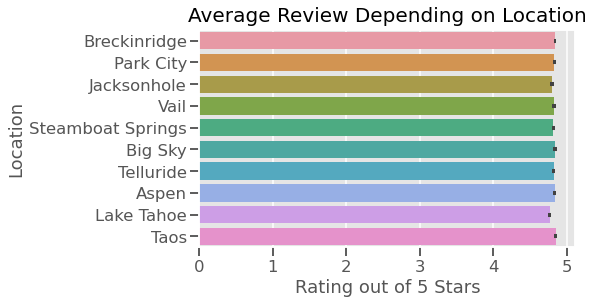

In [31]:
%matplotlib inline
plt.style.use('ggplot')
sns.set_context("talk")
ax = sns.barplot(x='score', y='city', data=clean_score_df, orient='h', saturation=0.7)
ax.axes.set_title("Average Review Depending on Location", fontsize=20, y=1.01)
ax.set(xlabel='Rating out of 5 Stars', ylabel='Location');

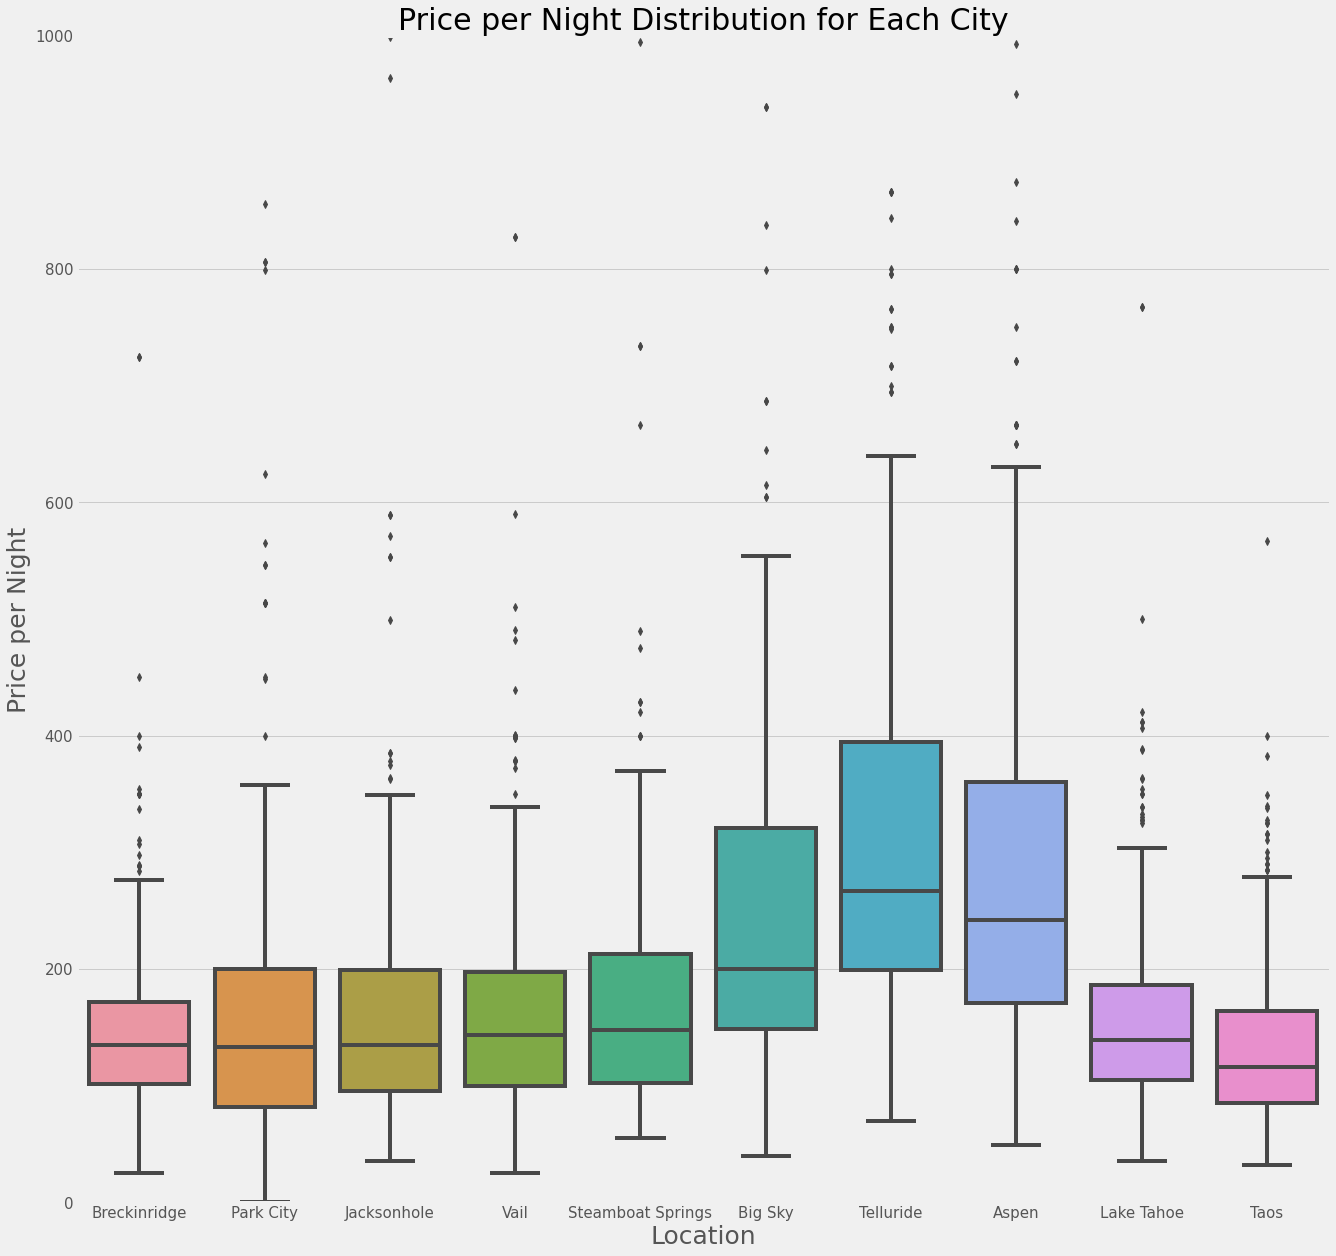

In [30]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 20),
         'xtick.labelsize': 15,
         'ytick.labelsize': 15}

fig = plt.figure()
pylab.rcParams.update(params)
plt.style.use('fivethirtyeight')
sns.boxplot(y='price',x='city',data = df)
plt.xlabel('Location', fontsize=25)
plt.ylabel('Price per Night', fontsize=25)
plt.ylim(0,1000)
plt.title('Price per Night Distribution for Each City', fontsize=30)
fig.savefig('../images/price_distribution.jpg')

In [34]:
df['roomtype'].value_counts()

Entire condominium           1289
Entire house                  423
Entire apartment              326
Entire cabin                  177
Private room                  151
Entire townhouse              144
Entire guest suite             71
Entire guesthouse              70
Hotel room                     48
Resort room                    44
Entire villa                   38
Entire loft                    37
Entire chalet                  28
Entire serviced apartment      21
Entire cottage                 21
Tiny house                     20
Room                           19
Entire bungalow                13
Camper/RV                      10
Earth house                     9
Entire place                    9
Yurt                            6
Shared room                     5
Tent                            4
Hostel room                     4
Bus                             3
Treehouse                       2
Tipi                            2
Dome house                      2
Farm stay     

In [37]:
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

ValueError: Plot kind 'price' is not recognized

In [18]:
#cost of living (col)
breckenridge_col = 141.6
parkcity_col = 175
jacksonhole_col = 177.6
vail_col = 190.9
steamboat_col = 144.8
bigsky_col = 116.7
telluride_col = 189.7
aspen_col = 290.1
tahoe_col = 155.1
taos_col = 104.3

In [19]:
final_df = df

In [20]:
final_df.columns

Index(['Unnamed: 0', 'title', 'toprow', 'roominfo', 'price', 'rating', 'link',
       'review', 'city', 'bbqgrill', 'chef', 'firepit', 'freeparking',
       'gameroom', 'gasfireplace', 'heatedfloors', 'heatedinfinitypool',
       'heating', 'hometheater', 'hottub', 'housekeeping', 'kitchen', 'pool',
       'skitchen', 'sonossoundsystem', 'terrace', 'washer', 'waterfront',
       'wetbar', 'wifi', 'name', 'location', 'roomtype', 'detailed_location',
       'guests', 'bedrooms', 'beds', 'bathrooms', 'score', 'reviewnumber',
       'pricepernight'],
      dtype='object')

In [21]:
removed_columns = ['Unnamed: 0', 'chef', 'gameroom', 'skitchen', 'heatedfloors', 'heatedinfinitypool', 'pool', 'hometheater', 'housekeeping', 'kitchen', 'waterfront', 'wetbar', 'title', 'toprow', 'roominfo', 'link', 'rating', 'review', 'name', 'location', 'detailed_location', 'pricepernight']
final_df.drop(removed_columns, axis=1, inplace=True)

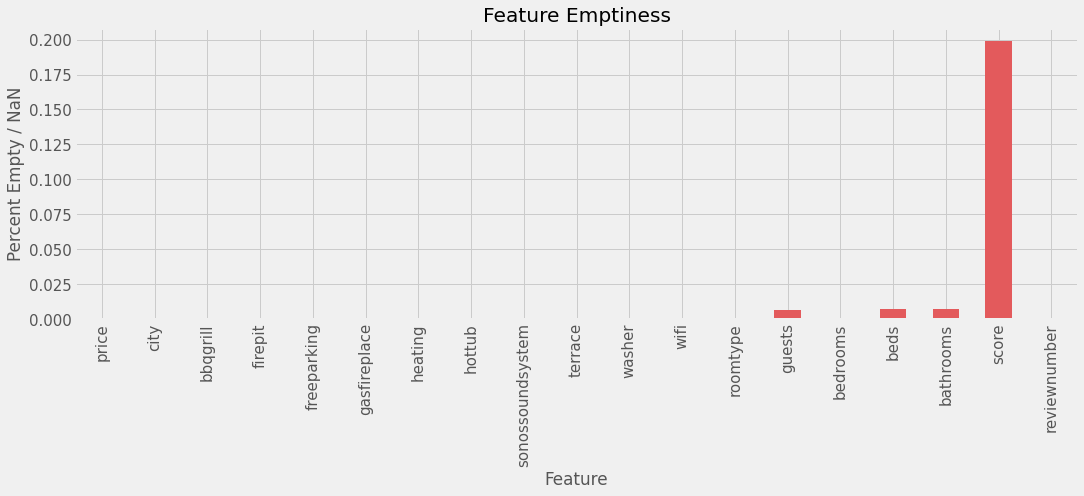

In [22]:
percentage_missing_data = final_df.isnull().sum() / final_df.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
plt.show()

In [23]:
import numpy as np
from sklearn import preprocessing

def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
temp_data = final_df

temp_data = temp_data.dropna(axis=0)

temp_data = temp_data.apply(encode_categorical)

corr_matrix = temp_data.corr()

corr_matrix

,price,city,bbqgrill,firepit,freeparking,gasfireplace,heating,hottub,sonossoundsystem,terrace,washer,wifi,roomtype,guests,bedrooms,beds,bathrooms,score,reviewnumber
price,1.000000,-0.092545,0.080435,0.064339,-0.112721,0.033216,-0.004929,0.221889,0.073673,0.064339,-0.016818,-0.009198,-0.009991,0.598620,0.049881,0.577554,0.663559,0.089692,-0.291470
city,-0.092545,1.000000,-0.051210,-0.025589,0.309005,-0.025589,-0.114256,-0.024032,-0.044340,-0.025589,-0.147032,0.061401,0.011282,-0.084471,-0.044273,-0.091846,-0.058765,0.004519,0.020206
bbqgrill,0.080435,-0.051210,1.000000,-0.000841,-0.071634,0.499685,-0.026659,0.046981,0.576743,-0.000841,-0.011411,-0.274535,0.062239,0.090194,0.010350,0.086743,0.107290,0.015084,-0.036353
firepit,0.064339,-0.025589,-0.000841,1.000000,-0.035794,-0.000420,-0.013321,-0.017898,0.577108,1.000000,-0.005702,-0.137181,-0.011882,0.059756,0.020562,0.064440,0.068307,0.019092,-0.018310
freeparking,-0.112721,0.309005,-0.071634,-0.035794,1.000000,-0.035794,-0.610478,-0.072019,-0.062023,-0.035794,0.147978,0.054362,0.076266,0.059562,-0.098946,0.024488,0.037215,0.093123,-0.016334
gasfireplace,0.033216,-0.025589,0.499685,-0.000420,-0.035794,1.000000,-0.013321,0.023476,0.577108,-0.000420,-0.005702,-0.137181,0.031100,0.042971,0.002973,0.052385,0.033038,0.019092,-0.018310
heating,-0.004929,-0.114256,-0.026659,-0.013321,-0.610478,-0.013321,1.000000,-0.164833,-0.023083,-0.013321,-0.180773,0.034216,-0.021861,-0.114439,0.040239,-0.081423,-0.082356,-0.008327,0.088248
hottub,0.221889,-0.024032,0.046981,-0.017898,-0.072019,0.023476,-0.164833,1.000000,0.016781,-0.017898,-0.242881,0.066669,-0.075602,0.249456,0.096468,0.201420,0.223395,-0.040691,-0.190578
sonossoundsystem,0.073673,-0.044340,0.576743,0.577108,-0.062023,0.577108,-0.023083,0.016781,1.000000,0.577108,-0.009880,-0.237705,0.029063,0.079306,0.015311,0.090772,0.097989,0.033082,-0.031560
terrace,0.064339,-0.025589,-0.000841,1.000000,-0.035794,-0.000420,-0.013321,-0.017898,0.577108,1.000000,-0.005702,-0.137181,-0.011882,0.059756,0.020562,0.064440,0.068307,0.019092,-0.018310


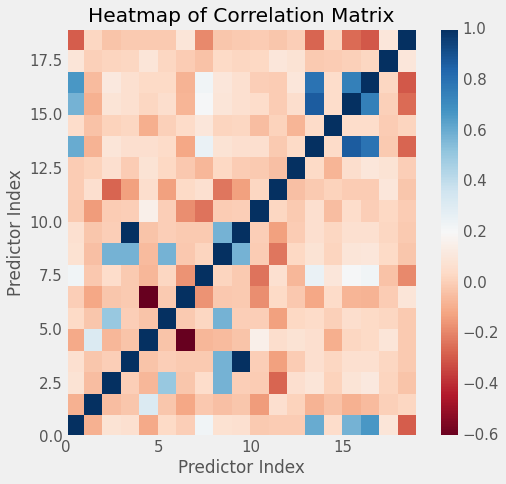

In [24]:
# Display heat map 
plt.figure(figsize=(7, 7))
plt.pcolor(corr_matrix, cmap='RdBu')
plt.xlabel('Predictor Index')
plt.ylabel('Predictor Index')
plt.title('Heatmap of Correlation Matrix')
plt.colorbar()

plt.show()

In [25]:
final_df = pd.get_dummies(final_df)
final_df.shape

(3000, 80)

In [28]:
from sklearn.utils import shuffle
final_df = shuffle(final_df)

y = final_df['price']
X = final_df.drop('price', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train.shape, X_test.shape

((2250, 79), (750, 79))

In [29]:
# Train and fit model   
rf = RandomForestClassifier(n_estimators=1000,
                           max_features='auto',
                           random_state=0)
X_test = X_test.fillna(X_train.mean())
rf.fit(X_train, y_train)
                                     
# Test Prediction
pred = rf.predict(X_test)
print(f"log loss = {log_loss(y_test, rf.predict_proba(X_test)[:, 1])}")
print(f"accuracy = {rf.score(X_test, y_test)}")

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
# Plot the feature importance
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh', figsize=(15,8));

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

my_pipeline_RF = make_pipeline(SimpleImputer(), StandardScaler(),
                               RandomForestRegressor(random_state=42))

my_pipeline_RF.fit(train_X, train_y)